In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
# import packages
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# read data
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
df.shape

(8693, 14)

In [6]:
df_test.shape

(4277, 13)

## Explore the dataset

In [7]:
# check missing values
miss_vals = df.isna().sum()
miss_vals

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
# check missing values in test dataset
miss_vals = df_test.isna().sum()
miss_vals

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

All columns have missing values except `PassengerId` and `Transported`.

In [9]:
# drop all rows with NULL values for simplicity
df = df.dropna(axis=0)
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [10]:
df.shape

(6606, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


**PassengerID**

In [12]:
df.PassengerId.nunique()

6606

All Id's are unique.

**HomePlanet**

In [13]:
print(df.HomePlanet.nunique())
print(df.HomePlanet.unique())

3
['Europa' 'Earth' 'Mars']


In [14]:
df.HomePlanet.value_counts()

Earth     3566
Europa    1673
Mars      1367
Name: HomePlanet, dtype: int64

In [15]:
def val_percent(col):
    print(df[col].value_counts()*100 / df.shape[0])

val_percent('HomePlanet')

Earth     53.981229
Europa    25.325462
Mars      20.693309
Name: HomePlanet, dtype: float64


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

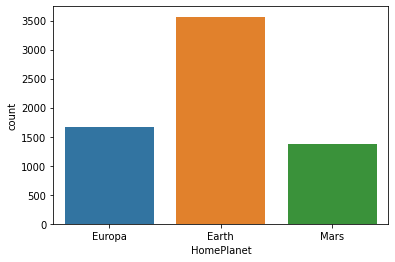

In [16]:
sns.countplot(data=df, x='HomePlanet')

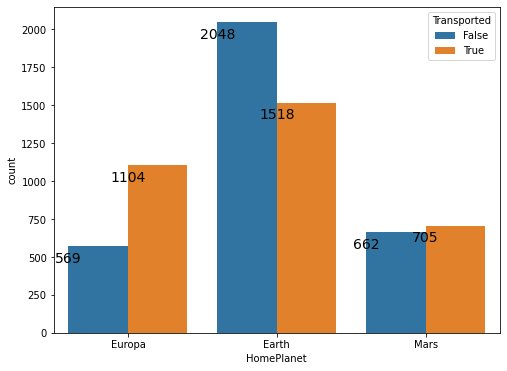

In [17]:
def annotate_bar(col):
    plt.figure(figsize=(8, 6))
    splot = sns.countplot(data=df, x=col, hue='Transported')
    for p in splot.patches:
        splot.annotate(format(round(p.get_height()), '.0f'),
                      (p.get_x() + p.get_y() / 2., p.get_height()),
                      ha='center', va='center', size=14, xytext=(0,-12),
                      textcoords='offset points')
        
annotate_bar('HomePlanet')

Most passengers were from `Earth`, more than double than that of second most planet `Europa`.

**CryoSleep**

In [18]:
df.CryoSleep.unique()

array([False, True], dtype=object)

In [19]:
df.CryoSleep.value_counts()

False    4274
True     2332
Name: CryoSleep, dtype: int64

In [20]:
val_percent('CryoSleep')

False    64.698759
True     35.301241
Name: CryoSleep, dtype: float64


<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

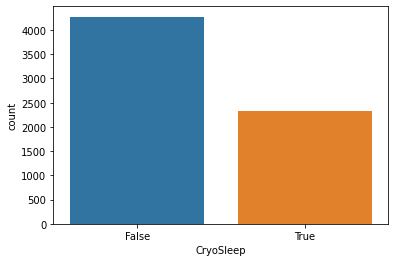

In [21]:
sns.countplot(data=df, x='CryoSleep')

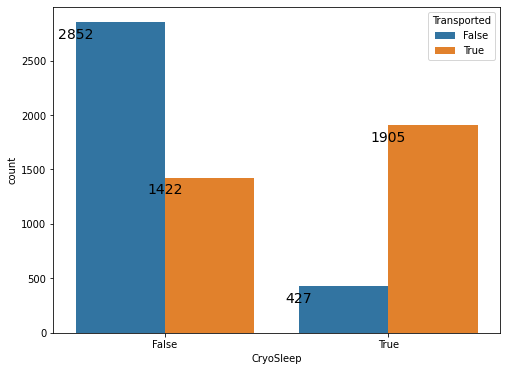

In [22]:
annotate_bar('CryoSleep')

If the passenger was in cryo sleep, he was more likely to be transported, than the passenger who was not in cryosleep

**Cabin**

In [23]:
# cabin
df['Cabin'].nunique()

5305

In [24]:
df['cabin_deck'] = df['Cabin'].apply(lambda x: x.split('/')[0])
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F


In [25]:
df['cabin_deck'].value_counts()

F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: cabin_deck, dtype: int64

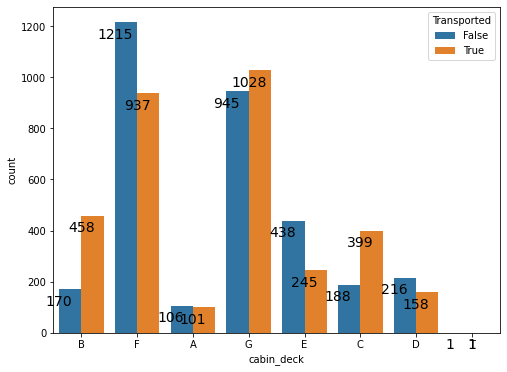

In [26]:
annotate_bar('cabin_deck')

Most Passengers were from `F` and `G` decks.
The likeliness of Transportation is less if the passenger is from deck `F` and `E`, whereas the likeliness is more in case of `B` and `C` decks.

In [27]:
df['cabin_num'] = df['Cabin'].apply(lambda x: x.split('/')[1])
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1


In [28]:
# convert to numeric
df['cabin_num'] = df['cabin_num'].astype(int)

<AxesSubplot:xlabel='cabin_num', ylabel='Density'>

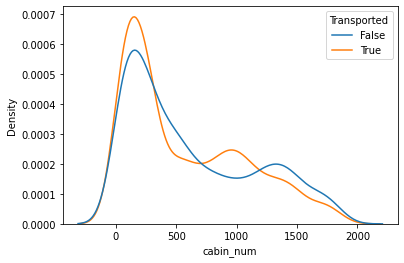

In [29]:
sns.kdeplot(data=df, x="cabin_num", hue='Transported')

In [30]:
df['cabin_num'].describe()

count    6606.000000
mean      599.177414
std       513.450585
min         0.000000
25%       166.000000
50%       424.000000
75%       994.000000
max      1894.000000
Name: cabin_num, dtype: float64

In [31]:
df['cabin_num'].mode()

0    82
dtype: int64

In [32]:
df['cabin_side'] = df['Cabin'].apply(lambda x: x.split('/')[2])
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


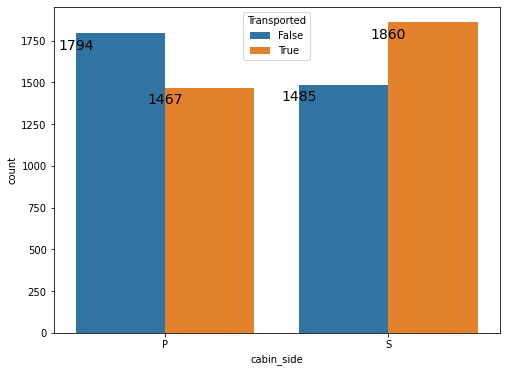

In [33]:
annotate_bar('cabin_side')

Most passengers from `Port` cabin were not Transported, while most passengers from `Starboard` cabin were Transported.

**Destination**

In [34]:
df['Destination'].nunique()

3

In [35]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

<AxesSubplot:xlabel='Destination', ylabel='count'>

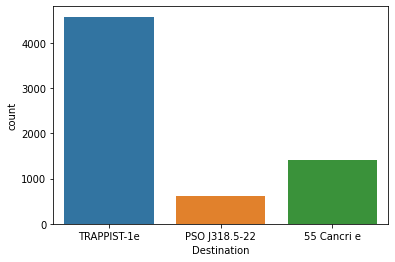

In [36]:
sns.countplot(data=df, x='Destination')

Most passengers were en route to `TRAPPIST-le`

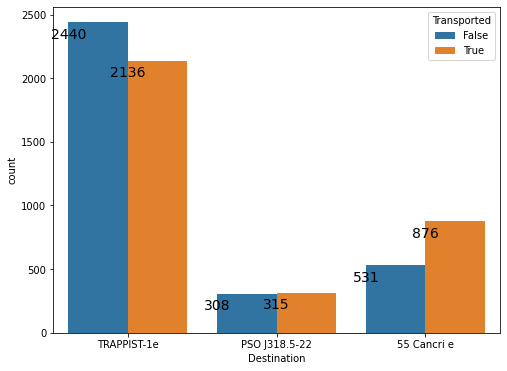

In [37]:
annotate_bar('Destination')

Not much of effect on Trasportation status.

<AxesSubplot:xlabel='Age', ylabel='Density'>

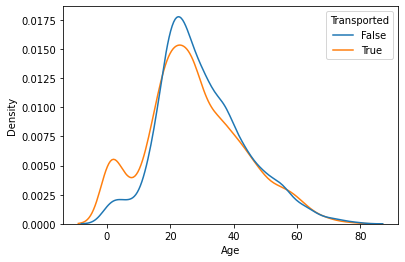

In [38]:
sns.kdeplot(data=df, x="Age", hue='Transported')

Most passengers were around 25 years of age. Not much effect on Trasportation status.

**VIP**

<AxesSubplot:xlabel='VIP', ylabel='count'>

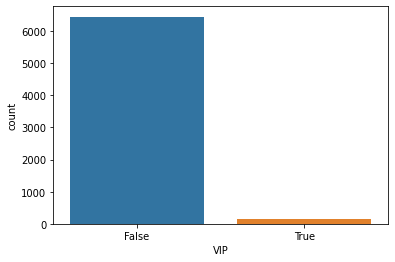

In [39]:
# VIP
sns.countplot(data=df, x='VIP')

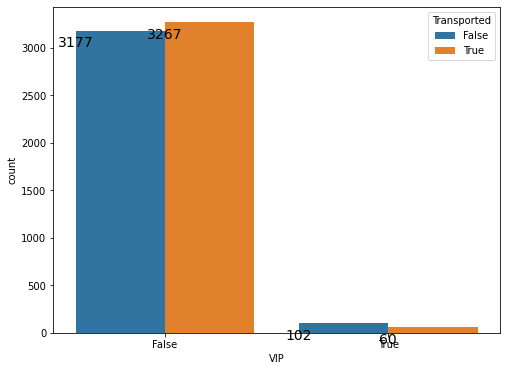

In [40]:
annotate_bar('VIP')

Not much of effect on Trasportation status.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**

<AxesSubplot:ylabel='Density'>

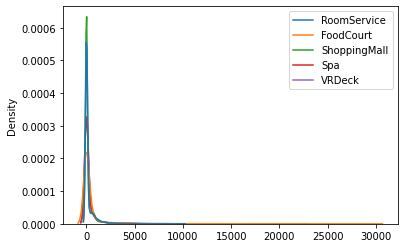

In [41]:
sns.kdeplot(data=df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

<AxesSubplot:xlabel='RoomService', ylabel='Density'>

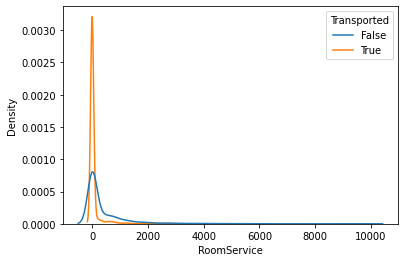

In [42]:
sns.kdeplot(data=df, x='RoomService', hue='Transported')

In [43]:
df['RoomService'].describe()

count    6606.000000
mean      222.991674
std       644.987936
min         0.000000
25%         0.000000
50%         0.000000
75%        49.000000
max      9920.000000
Name: RoomService, dtype: float64

<AxesSubplot:xlabel='RoomService', ylabel='Transported'>

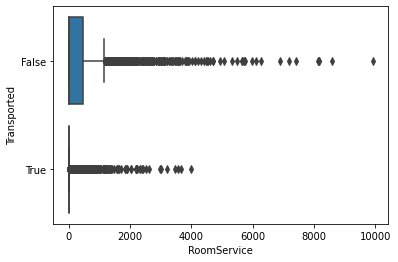

In [44]:
df['Transported'] = df['Transported'].astype(str)
sns.boxplot(data=df, x='RoomService', y='Transported')

Too much skqewness in all these variables

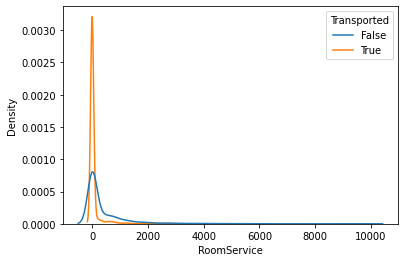

count    6606.000000
mean      222.991674
std       644.987936
min         0.000000
25%         0.000000
50%         0.000000
75%        49.000000
max      9920.000000
Name: RoomService, dtype: float64


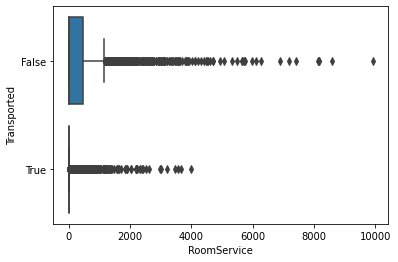

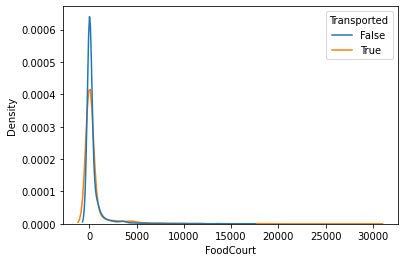

count     6606.000000
mean       478.958523
std       1678.592291
min          0.000000
25%          0.000000
50%          0.000000
75%         82.750000
max      29813.000000
Name: FoodCourt, dtype: float64


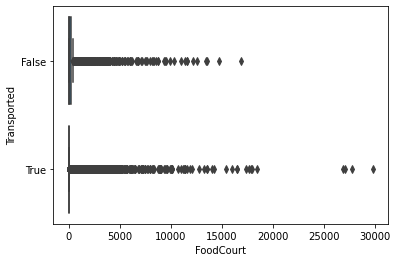

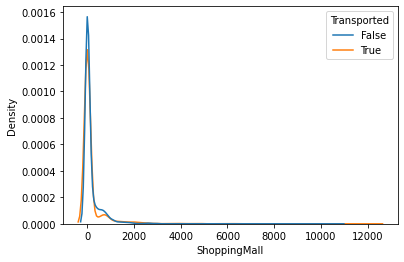

count     6606.000000
mean       178.356494
std        576.328407
min          0.000000
25%          0.000000
50%          0.000000
75%         30.000000
max      12253.000000
Name: ShoppingMall, dtype: float64


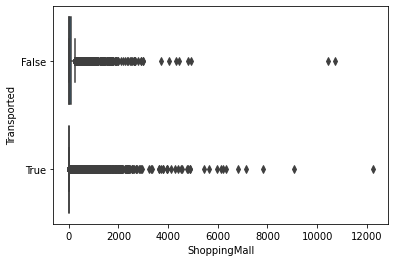

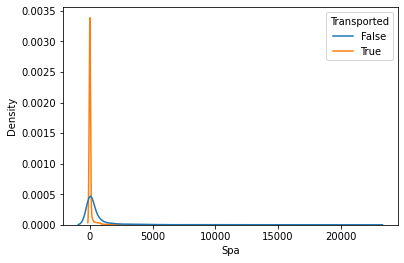

count     6606.000000
mean       313.161520
std       1144.016291
min          0.000000
25%          0.000000
50%          0.000000
75%         65.000000
max      22408.000000
Name: Spa, dtype: float64


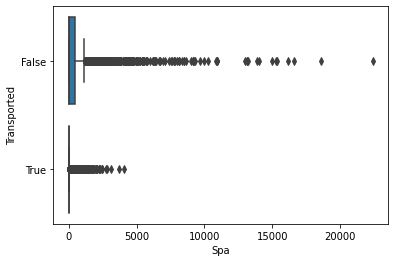

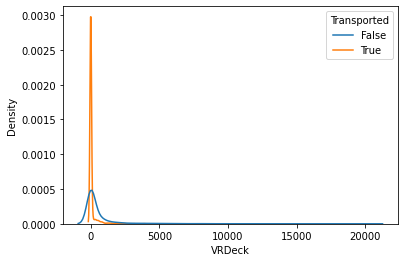

count     6606.000000
mean       303.780048
std       1127.142166
min          0.000000
25%          0.000000
50%          0.000000
75%         52.000000
max      20336.000000
Name: VRDeck, dtype: float64


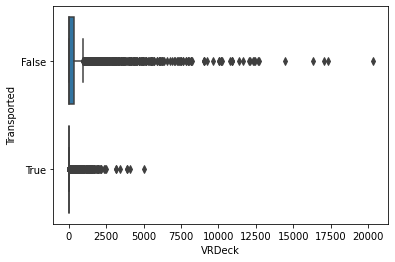

In [45]:
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    sns.kdeplot(data=df, x=col, hue='Transported')
    plt.show()
    print(df[col].describe())
    sns.boxplot(data=df, x=col, y='Transported')
    plt.show()

All values are positive skewed.

## Feature Engineering

**HomePlanet**

In [46]:
df['homeplanet_code'] = df['HomePlanet'].map({'Earth':0, 'Europa':1, 'Mars':2})
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num,cabin_side,homeplanet_code
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,0


In [47]:
df['homeplanet_code'].value_counts()

0    3566
1    1673
2    1367
Name: homeplanet_code, dtype: int64

In [48]:
df['HomePlanet'].value_counts()

Earth     3566
Europa    1673
Mars      1367
Name: HomePlanet, dtype: int64

**CryoSleep**

In [49]:
df['cryosleep_code'] = df['CryoSleep'].map({False:0, True:1})
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin_deck,cabin_num,cabin_side,homeplanet_code,cryosleep_code
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,0,0


In [50]:
df['cryosleep_code'].value_counts()

0    4274
1    2332
Name: cryosleep_code, dtype: int64

In [51]:
df['CryoSleep'].value_counts()

False    4274
True     2332
Name: CryoSleep, dtype: int64

**Cabin**

In [52]:
df['cabin_deck_code'] = df['cabin_deck'].map({'A':0, 
                                              'B':1,
                                              'C':2,
                                              'D':3,
                                              'E':4,
                                              'F':5,
                                              'G':6,
                                              'T':7
                                             })
print(df['cabin_deck_code'].value_counts())

5    2152
6    1973
4     683
1     628
2     587
3     374
0     207
7       2
Name: cabin_deck_code, dtype: int64


In [53]:
df['cabin_deck'].value_counts()

F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: cabin_deck, dtype: int64

In [54]:
df['cabin_side_code'] = df['cabin_side'].map({'P':0,'S':1})

In [55]:
df['cabin_side_code'].value_counts()

1    3345
0    3261
Name: cabin_side_code, dtype: int64

In [56]:
df['cabin_side'].value_counts()

S    3345
P    3261
Name: cabin_side, dtype: int64

**Destination**

In [57]:
df['destination_code'] = df['Destination'].map({
    'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2
})

In [58]:
df['destination_code'].value_counts()

0    4576
2    1407
1     623
Name: destination_code, dtype: int64

In [59]:
df['Destination'].value_counts()

TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: Destination, dtype: int64

**VIP**

In [60]:
df['vip_code'] = df['VIP'].map({False:0, True:1})

In [61]:
df['vip_code'].value_counts()

0    6444
1     162
Name: vip_code, dtype: int64

In [62]:
df['VIP'].value_counts()

False    6444
True      162
Name: VIP, dtype: int64

**Total spent**

In [63]:
# total spent
df['total_spent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

**Target variable - Transported**

In [64]:
# target variable
df['transported_code'] = df['Transported'].map({'True':0, 'False':1})

## Modelling

In [65]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'cabin_deck', 'cabin_num', 'cabin_side',
       'homeplanet_code', 'cryosleep_code', 'cabin_deck_code',
       'cabin_side_code', 'destination_code', 'vip_code', 'total_spent',
       'transported_code'],
      dtype='object')

In [66]:
# columns to use
x_cols = [
     'total_spent',
    'homeplanet_code',
    'cryosleep_code',
    'cabin_deck_code',
    'cabin_side_code',
    'destination_code',
    'vip_code'
]
# y_col = 'Transported'
y_col = 'transported_code'

In [67]:
# X = df.drop(columns=['Transported'])
X = df[x_cols]
y = df[y_col]

In [68]:
# convert to numpy
X = X.to_numpy()
y = y.to_numpy()

In [69]:
X

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.3600e+02, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0383e+04, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [1.8730e+03, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.6370e+03, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 2.0000e+00,
        0.0000e+00],
       [4.8260e+03, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [70]:
y

array([1, 0, 1, ..., 0, 1, 0])

In [71]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4426, 7)
(4426,)
(2180, 7)
(2180,)


In [72]:
y_train

array([0, 0, 1, ..., 1, 1, 0])

In [73]:
y_test

array([0, 0, 0, ..., 1, 0, 1])

In [74]:
# convert to numpy for lazypredict package
# X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()
# y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()

In [75]:
# installing lazypredict
!pip install lazypredict

In [76]:
# import lazypredict package
from lazypredict.Supervised import LazyClassifier

In [77]:
# Fit the classifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:10<00:00,  2.74it/s]


In [78]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.76,0.76,0.76,0.75,0.19
XGBClassifier,0.75,0.75,0.75,0.75,0.56
NuSVC,0.75,0.75,0.75,0.75,3.28
AdaBoostClassifier,0.75,0.75,0.75,0.75,0.21
LabelSpreading,0.74,0.74,0.74,0.73,1.07
SVC,0.73,0.74,0.74,0.73,1.22
LabelPropagation,0.73,0.74,0.74,0.73,0.78
RidgeClassifierCV,0.73,0.74,0.74,0.73,0.07
RidgeClassifier,0.73,0.74,0.74,0.73,0.03


## LightGBM

In [79]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [80]:
# predict the results
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [81]:
# count the elements
unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 1006]
 [   1 1174]]


In [82]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.7472


In [83]:
# to calculate train accuracy
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7808


## Parameter Tuning

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
# define model
clf = lgb.LGBMClassifier()

In [86]:
# Grid search
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid = GridSearchCV(clf, gridParams, verbose=1, cv=3, n_jobs=-1)
# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 3 folds for each of 3456 candidates, totalling 10368 fits
{'boosting_type': 'gbdt', 'colsample_bytree': 0.65, 'learning_rate': 0.005, 'max_bin': 255, 'n_estimators': 16, 'num_leaves': 6, 'objective': 'binary', 'random_state': 500, 'reg_alpha': 1.2, 'reg_lambda': 1, 'subsample': 0.7}
0.7300059712461531


In [87]:
best_params = grid.best_params_

In [88]:
# fit the model on whole data with best params
clf = lgb.LGBMClassifier(
    boosting_type=best_params['boosting_type'],
    colsample_bytree=best_params['colsample_bytree'],
    learning_rate=best_params['learning_rate'],
    max_bin=best_params['max_bin'],
    n_estimators=best_params['n_estimators'],
    num_leaves=best_params['num_leaves'],
    objective=best_params['objective'],
    random_state=best_params['random_state'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    subsample=best_params['subsample']
)
clf.fit(X,y)

LGBMClassifier(colsample_bytree=0.65, learning_rate=0.005, max_bin=255,
               n_estimators=16, num_leaves=6, objective='binary',
               random_state=500, reg_alpha=1.2, reg_lambda=1, subsample=0.7)

## Submit result

In [89]:
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez
